<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [ ]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
#%config InlineBackend.figure_format = 'retina'


In [ ]:
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [ ]:
# read sat_scores.csv into a DataFrame
data = pd.read_csv('sat_scores.csv')
data.head()

In [ ]:
print data.columns,'\n'
print list(data['State']),'\n'

sat_scores_dict ={}

for k in data.columns:
    sat_scores_dict[k] = list(data[k])
    
print sat_scores_dict

#dict comprehension: sat_scores_dict = {col:list(data[col]) for col in data.columns}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [ ]:
# df from dict
print 'DF from dict'
print pd.DataFrame(sat_scores_dict).head(), '\n' 
print pd.DataFrame(sat_scores_dict).dtypes, '\n' 


# df from .read_csv
print 'DF from .read_csv'
print data.head()
data.dtypes

### No difference in dtypes between the two versions



In [ ]:
If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

sat_data = data
sat_data.head(2)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

Field | DataType | Description | Sample |
:--------|:---------|:--------------|---------------|-------------|
state | Object | US State that the data was collected from | CT, NJ
rate | int64 | Participation Rate | 82
verbal | int64 | Verbal Score | 509
math| int64 | Math Score | 516

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [ ]:
sns.set_style(style = 'darkgrid')

sns.distplot(data['Rate'],bins=20,kde=False)

In [ ]:
sns.distplot(data['Verbal'],bins=20,kde = False)

In [ ]:
sns.distplot(data['Math'],bins=20,kde = False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [ ]:
sns.pairplot(data)

### Interpreting the pairplots

> Math and Verbal skills appear to be positively correlated ie high Math skills implies high Verbal skills and vice versa

In [ ]:
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [ ]:
data['Math'].plot.hist(stacked=True)
data['Verbal'].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
data.plot.box(y=['Math','Verbal'])


In [ ]:
data.plot.box()

#### What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

>The horizontal scale renders the figure unreadable


In [ ]:
<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [ ]:
'''
I would 
a. take out the rate and plot it seperately; there is no value in having it on the same chart
b. normalise the verbal and math scores if they are not on the same scale
c. I could use a secondary y axis to take care of the rate but that would be less meaningful

'''

In [ ]:
sat_data.plot.box(y=['Math','Verbal'],secondary_y=['Rate'])
#data['Rate'].plot.box(secondary_y=['Rate'])

In [ ]:
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
# Mean of Verbal scores across all states
verbal_mean = data['Verbal'].mean()
print 'verbal_mean:', verbal_mean,'\n'

[data[['State','Verbal']][data['Verbal']> verbal_mean]]


verbal_mean: 532.019230769 



[   State  Verbal
 26    CO     539
 27    OH     534
 28    MT     539
 30    ID     543
 31    TN     562
 32    NM     551
 33    IL     576
 34    KY     550
 35    WY     547
 36    MI     561
 37    MN     580
 38    KS     577
 39    AL     559
 40    NE     562
 41    OK     567
 42    MO     577
 43    LA     564
 44    WI     584
 45    AR     562
 46    UT     575
 47    IA     593
 48    SD     577
 49    ND     592
 50    MS     566]

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
verbal_median = data['Verbal'].median()
print 'verbal_median:' , verbal_median,'\n'

[data[['State','Verbal']][data['Verbal']> verbal_median]]

verbal_median: 526.5 



[   State  Verbal
 19    WA     527
 26    CO     539
 27    OH     534
 28    MT     539
 29    WV     527
 30    ID     543
 31    TN     562
 32    NM     551
 33    IL     576
 34    KY     550
 35    WY     547
 36    MI     561
 37    MN     580
 38    KS     577
 39    AL     559
 40    NE     562
 41    OK     567
 42    MO     577
 43    LA     564
 44    WI     584
 45    AR     562
 46    UT     575
 47    IA     593
 48    SD     577
 49    ND     592
 50    MS     566]

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
data['V1'] = data['Verbal']-data['Math']
data.head()

,State,Rate,Verbal,Math,V1
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
# DF with 10 states with the greatest gap between V and M scores, where V > M, sorted by state rank
# V1 is (Verbal - Math). Sorted by V1 and positive to ensure V > M. Verbal score > Math score

data2 = data.sort_values('V1',ascending = False) #clarification: why doesnt 'Verbal - Math' work as a key?
top_states_VM = data2.head(10)
print top_states_VM,'\n'

# DF 10 states with greatest gap between V and M, where M > V, sorted by state rank
data3 = data.sort_values('V1')
top_states_MV = data3.head(10)
print top_states_MV,'\n'

# row 51 All is not a state
top_states_MV2 = data3.head(11)
top_states_MV3 = top_states_MV2.drop(51)
print top_states_MV3,'\n'

# to answer question 3
print top_states_VM.head(3),'\n'
print top_states_MV3.head(3)





   State  Rate  Verbal  Math  V1
27    OH    26     534   439  95
50    MS     4     566   551  15
29    WV    18     527   512  15
45    AR     6     562   550  12
32    NM    13     551   542   9
31    TN    13     562   553   9
9     VA    68     510   501   9
16    DC    56     482   474   8
8     ME    69     506   500   6
41    OK     8     567   561   6 

   State  Rate  Verbal  Math  V1
21    HI    52     485   515 -30
23    CA    51     498   517 -19
1     NJ    81     499   513 -14
33    IL    12     576   589 -13
44    WI     6     584   596 -12
36    MI    11     561   572 -11
3     NY    77     495   505 -10
47    IA     5     593   603 -10
37    MN     9     580   589  -9
51   All    45     506   514  -8 

   State  Rate  Verbal  Math  V1
21    HI    52     485   515 -30
23    CA    51     498   517 -19
1     NJ    81     499   513 -14
33    IL    12     576   589 -13
44    WI     6     584   596 -12
36    MI    11     561   572 -11
3     NY    77     495   505 -10
47    

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat_corr = data.corr()
print sat_corr

            Rate    Verbal      Math        V1
Rate    1.000000 -0.886432 -0.773746 -0.101412
Verbal -0.886432  1.000000  0.899871  0.052600
Math   -0.773746  0.899871  1.000000 -0.388219
V1     -0.101412  0.052600 -0.388219  1.000000


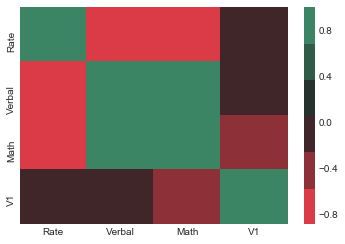

In [22]:
cmap = sns.diverging_palette(10, 150, center='dark')
sns.heatmap(sat_corr, cmap = cmap)

#### Green indicates strong positive correlation - **Math** and **Verbal** scores
#### Red indicates strong negative correlation - **Participation Rate** and **Math, Verbal** scores

In [ ]:
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
sat_corr.describe()

,Rate,Verbal,Math,V1
count,4.000000,4.000000,4.000000,4.000000
mean,-0.190398,0.266510,0.184476,0.140742
std,0.865972,0.878291,0.898710,0.601258
min,-0.886432,-0.886432,-0.773746,-0.388219
25%,-0.801918,-0.182158,-0.484601,-0.173114
50%,-0.437579,0.476236,0.255826,-0.024406
75%,0.173941,0.924903,0.924903,0.289450
max,1.000000,1.000000,1.000000,1.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [25]:
# covariance matrix

sat_cov = data.cov()
print sat_cov

              Rate       Verbal         Math          V1
Rate    745.387632  -804.355958  -760.803922  -43.552036
Verbal -804.355958  1104.646682  1077.147059   27.499623
Math   -760.803922  1077.147059  1297.078431 -219.931373
V1      -43.552036    27.499623  -219.931373  247.430995


### How covariance differs from correlation

#### Covariance
- Expected value of the product of the distance of the variable from their expected values
- Measures how much two variables vary with each other
-  cov(x,y) = E ([(x - E[x])(y - E[y]))

#### Correlation
- Change in one item may result in the change in another item
- Measures how strongly two variables are related
                  
### Why correlation is preferred to covariance for examining data relationships
- Correlation measures how strongly two random variables are **related**, while covariance measures the extent of change in tandem
- Correlation is unaffected by change in scale and can be used to make a comparison between two pairs of variables                  
                  



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

Header | Definition
---|---------
`alcohol-use` | Percentage of those in an age group who used alcohol in the past 12 months
`alcohol-frequency` | Median number of times a user in an age group used alcohol in the past 12 months


In [26]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### Process
1. Load Data
2. Describe the basic format of data and columns
3. Drop unwanted columns
4. Clean corrupted columns
5. Count null values and drop rows
6. Rename columns
7. Describe summary statistics for columns
8. Investigate potential outliers with boxplots
9. Plot all variables in a horizontal boxplot
10. Standardize variables
11. Plot standardized variables
12. Look at covariance or correlation between variables

In [27]:
# 1. Load Data

drug = pd.DataFrame.from_csv('drug-use-by-age.csv')
drug.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [28]:
# 2. Describe basic format of data and columns

drug.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        17 non-null object
tranquilizer-u

In [29]:
# Summary Statistsics
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [30]:
# 3 -6 Clean the data
# Convert all columns to float64 - 'cocaine,crack,heroin, inhalant, oxycontin, meth-frequency'

col = drug.columns[drug.dtypes == object]
drug[col] = drug[col].apply(pd.to_numeric,errors='coerce')
drug = drug.fillna(0)
drug.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        17 non-null float64
tranquili

Index([u'alcohol-use', u'marijuana-use', u'cocaine-use', u'crack-use',
       u'heroin-use', u'hallucinogen-use', u'inhalant-use',
       u'pain-releiver-use', u'oxycontin-use', u'tranquilizer-use',
       u'stimulant-use', u'meth-use', u'sedative-use'],
      dtype='object')


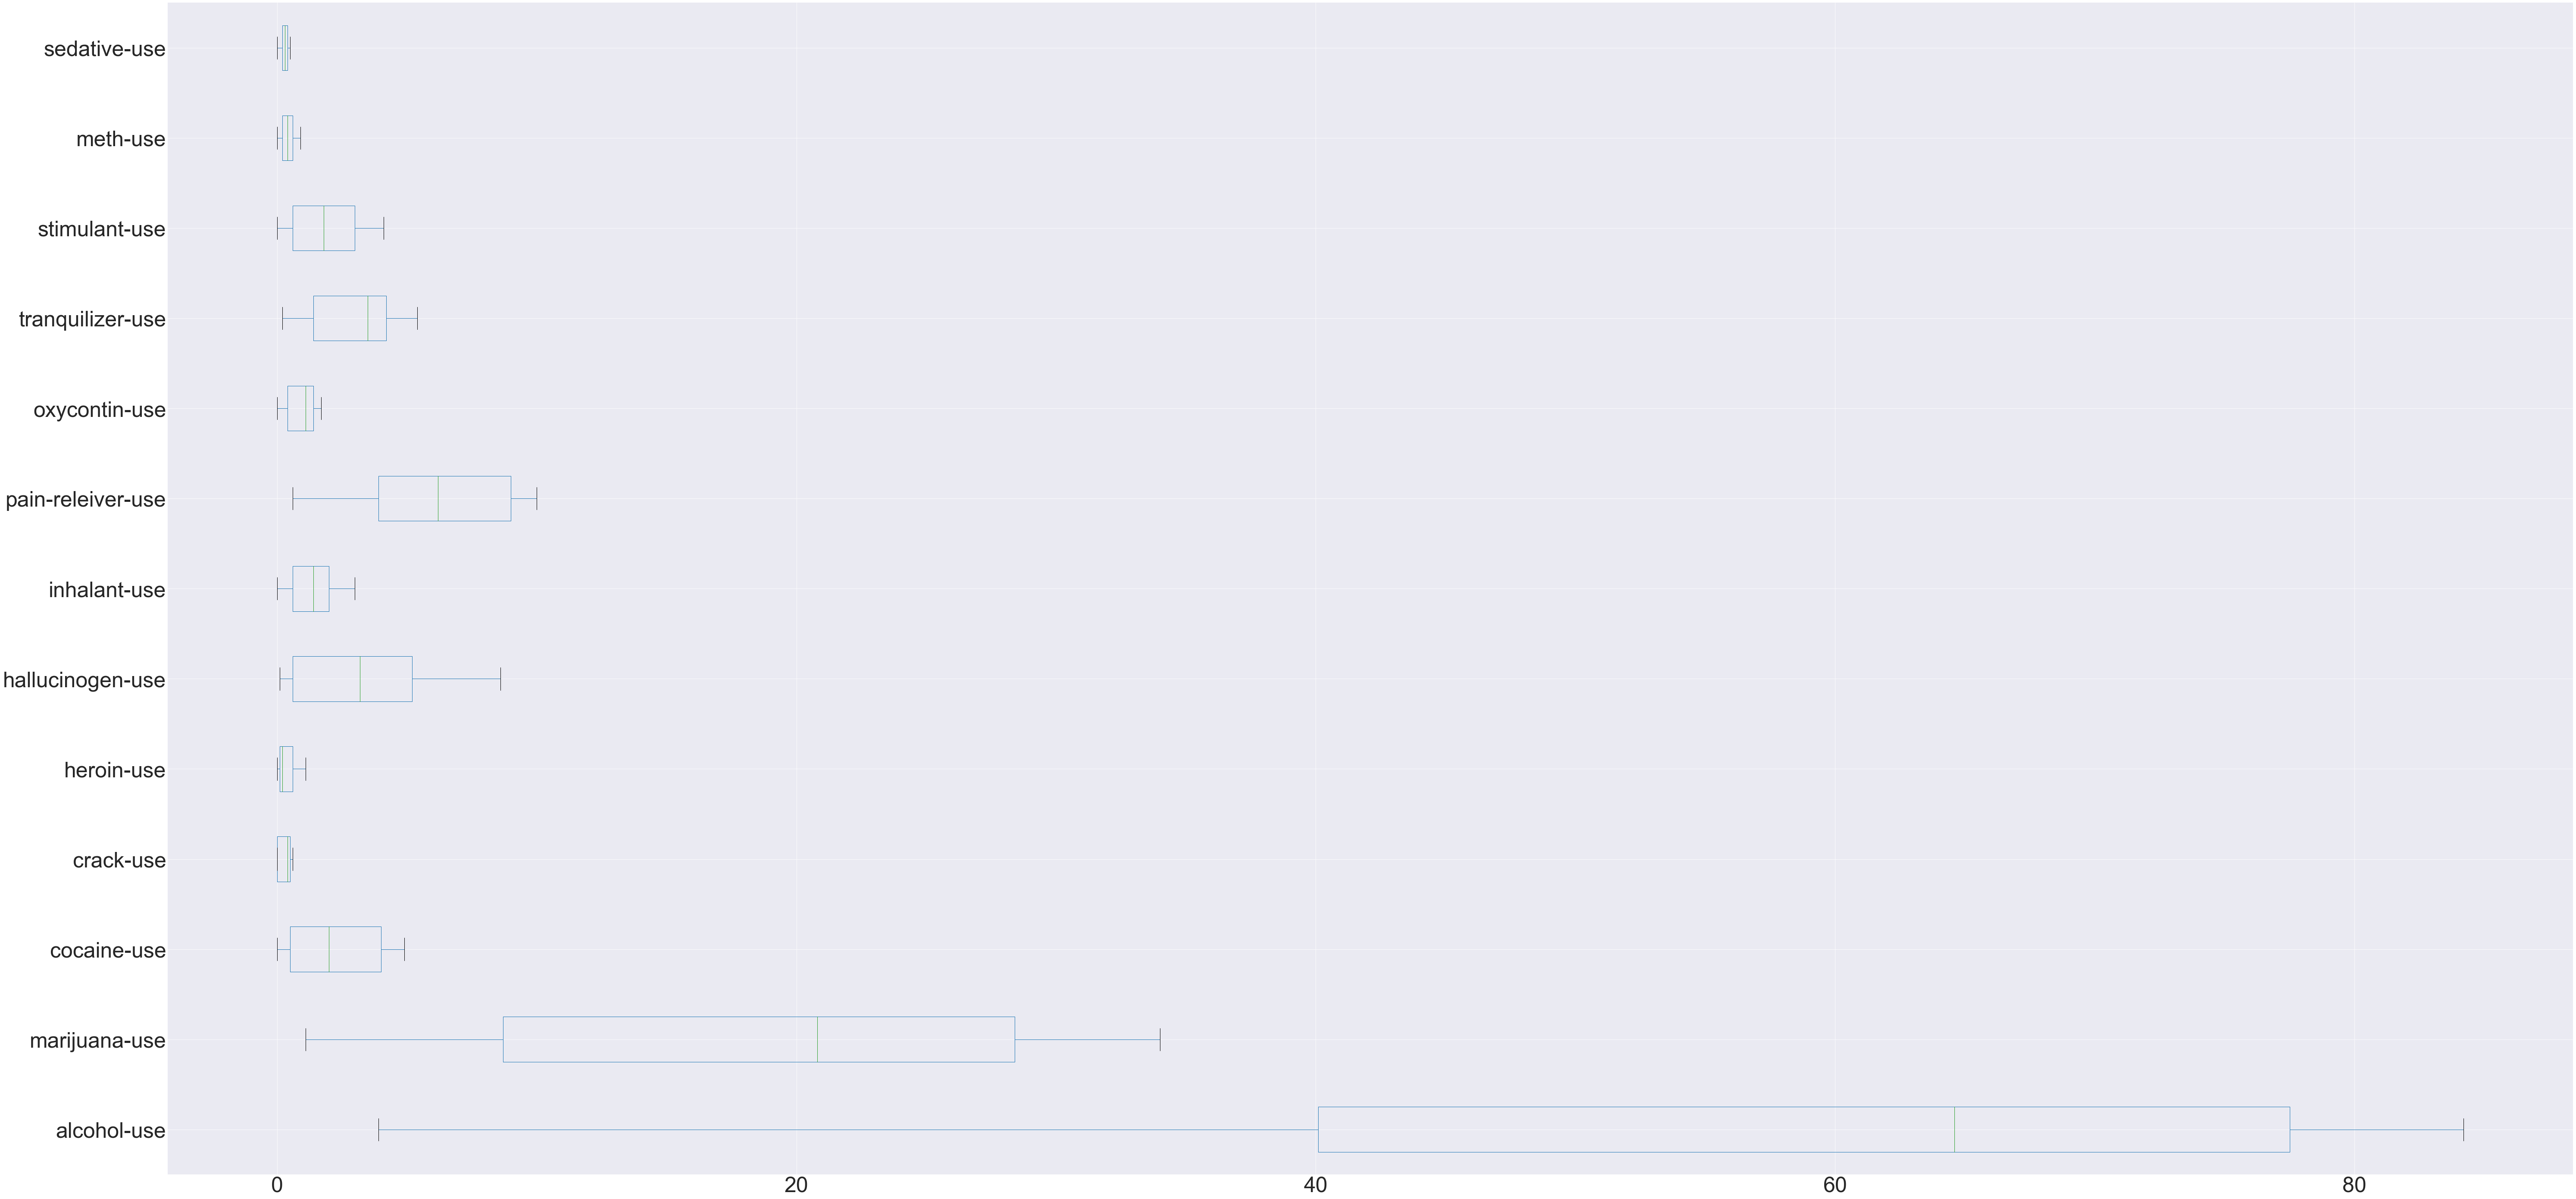

In [31]:
# 7. Check for outliers with a box plot
# Percentage of those in an age group who used xxx in the past 12 months

col1 = drug.columns[drug.columns.str.contains('use')]
print col1
drug[col1].plot.box(vert = False, figsize = (100,50), fontsize = 50)


Index([u'alcohol-frequency', u'marijuana-frequency', u'cocaine-frequency',
       u'crack-frequency', u'heroin-frequency', u'hallucinogen-frequency',
       u'inhalant-frequency', u'pain-releiver-frequency',
       u'oxycontin-frequency', u'tranquilizer-frequency',
       u'stimulant-frequency', u'meth-frequency', u'sedative-frequency'],
      dtype='object')


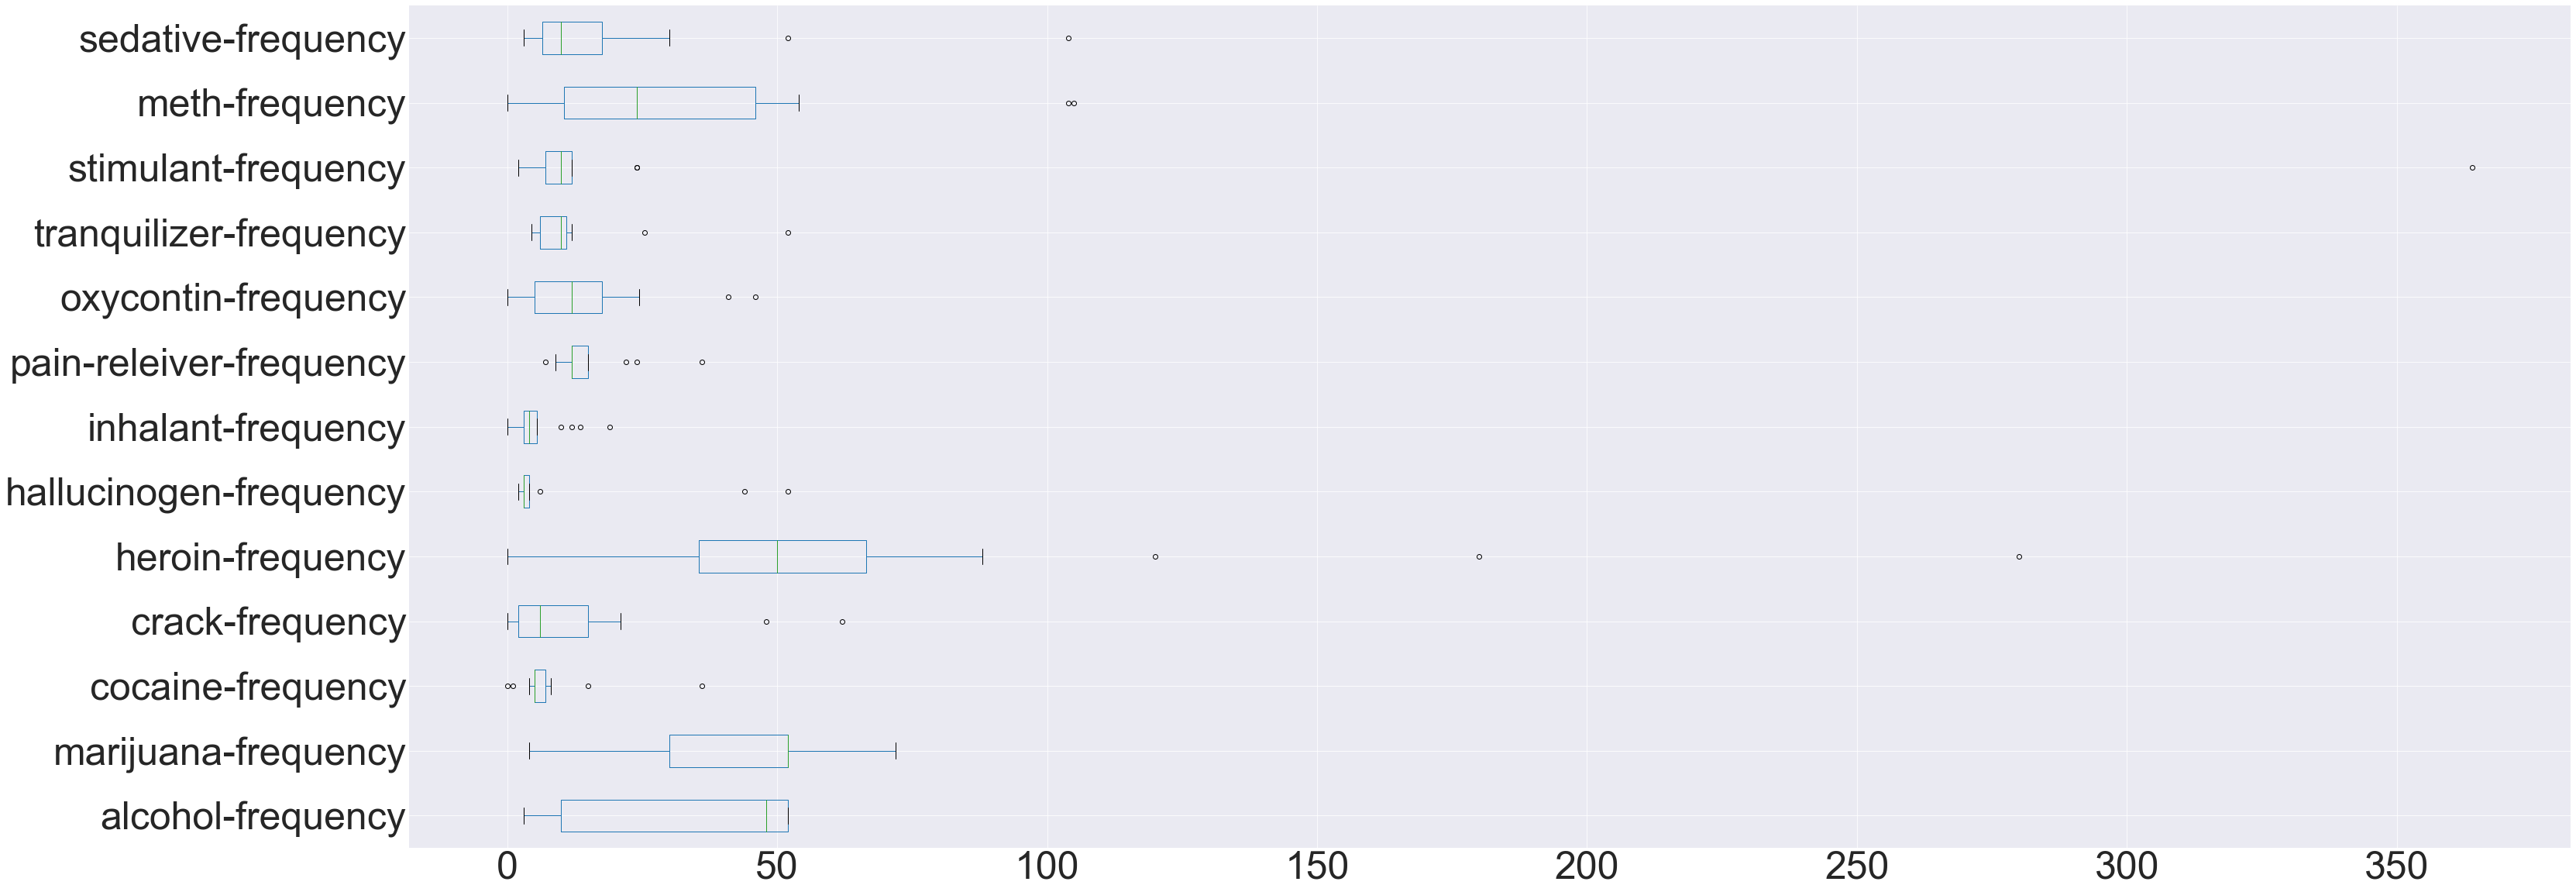

In [33]:
# 7. Check for outliers with a box plot
# Median number of times a user in an age group used xxx in the past 12 months

col2 = drug.columns[drug.columns.str.contains('frequency')]
print col2
drug[col2].plot.box(vert = False, figsize = (50,20), fontsize = 50)

In [34]:
# 10. Standardize Variables

drug_norm = (drug - drug.mean())/drug.std()
drug_norm.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,-0.349073,-1.917098,-1.423762,-1.490293,-2.120683,-1.142945,-0.300939,-1.247469,-0.713206,-0.757849,...,-1.373352,0.818378,-1.486206,3.505789,-1.220203,-0.339023,-1.455128,-0.985372,-0.596759,-0.257006
13,-0.380663,-1.745959,-1.283041,-1.297981,-1.521638,-1.142945,-0.800059,-1.247469,-0.540410,-1.057464,...,-1.373352,2.097236,-1.429173,1.198473,-1.149164,-0.315760,-1.074556,-0.830123,-1.321394,-0.015397
14,-0.353696,-1.388802,-1.329948,-0.854828,-1.031510,-1.142945,-0.238550,-1.247469,-0.713206,-0.757849,...,-0.880106,-0.731753,-1.086977,-0.586432,-0.793968,-0.222708,-1.074556,-0.240179,-0.596759,-0.116067
15,-0.227337,-0.975838,-1.283041,-0.369868,-0.977052,-0.922774,-0.425719,-0.823329,-0.166020,-0.458234,...,-0.222444,-0.848013,-0.459617,-0.629966,-0.296693,-0.292497,-0.313412,-0.659350,0.852512,0.427553
16,-0.148748,-0.570315,-1.095414,0.299042,-0.704759,-0.647561,-0.051380,-1.247469,-0.655608,-0.757849,...,0.270802,-0.770506,-0.231486,-0.064021,-0.083576,-0.251787,-0.313412,0.132418,-0.596759,-0.659687


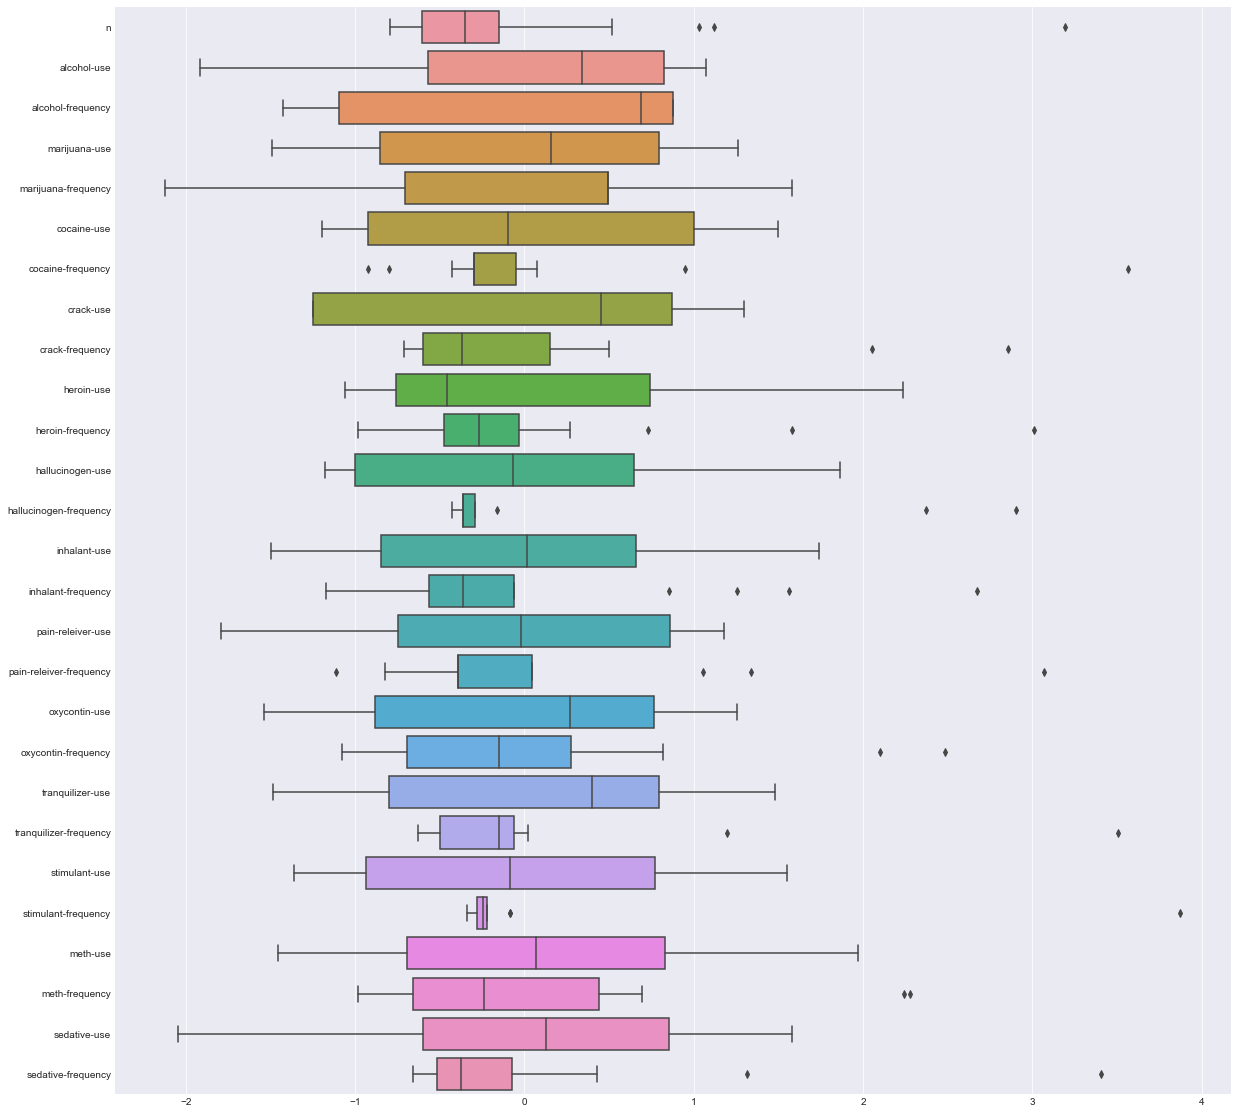

In [35]:
# 11. Plot standardized variables
plt.figure(figsize=(20,20))
sns.boxplot(data = drug_norm, orient ='h')

In [36]:
# 12. Correlation
drug_corr = drug.corr()
print (drug_corr)


                                n  alcohol-use  alcohol-frequency  \
n                        1.000000     0.310512           0.313431   
alcohol-use              0.310512     1.000000           0.897889   
alcohol-frequency        0.313431     0.897889           1.000000   
marijuana-use           -0.169007     0.594165           0.260219   
marijuana-frequency      0.135597     0.920425           0.818769   
cocaine-use             -0.021565     0.773458           0.577601   
cocaine-frequency        0.388318     0.260301           0.317172   
crack-use                0.281797     0.877378           0.785050   
crack-frequency          0.574629     0.337802           0.364267   
heroin-use               0.007798     0.677614           0.546194   
heroin-frequency         0.617432     0.396779           0.432405   
hallucinogen-use        -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.008743    -0.346643          -0.174622   
inhalant-use            -0.368395 

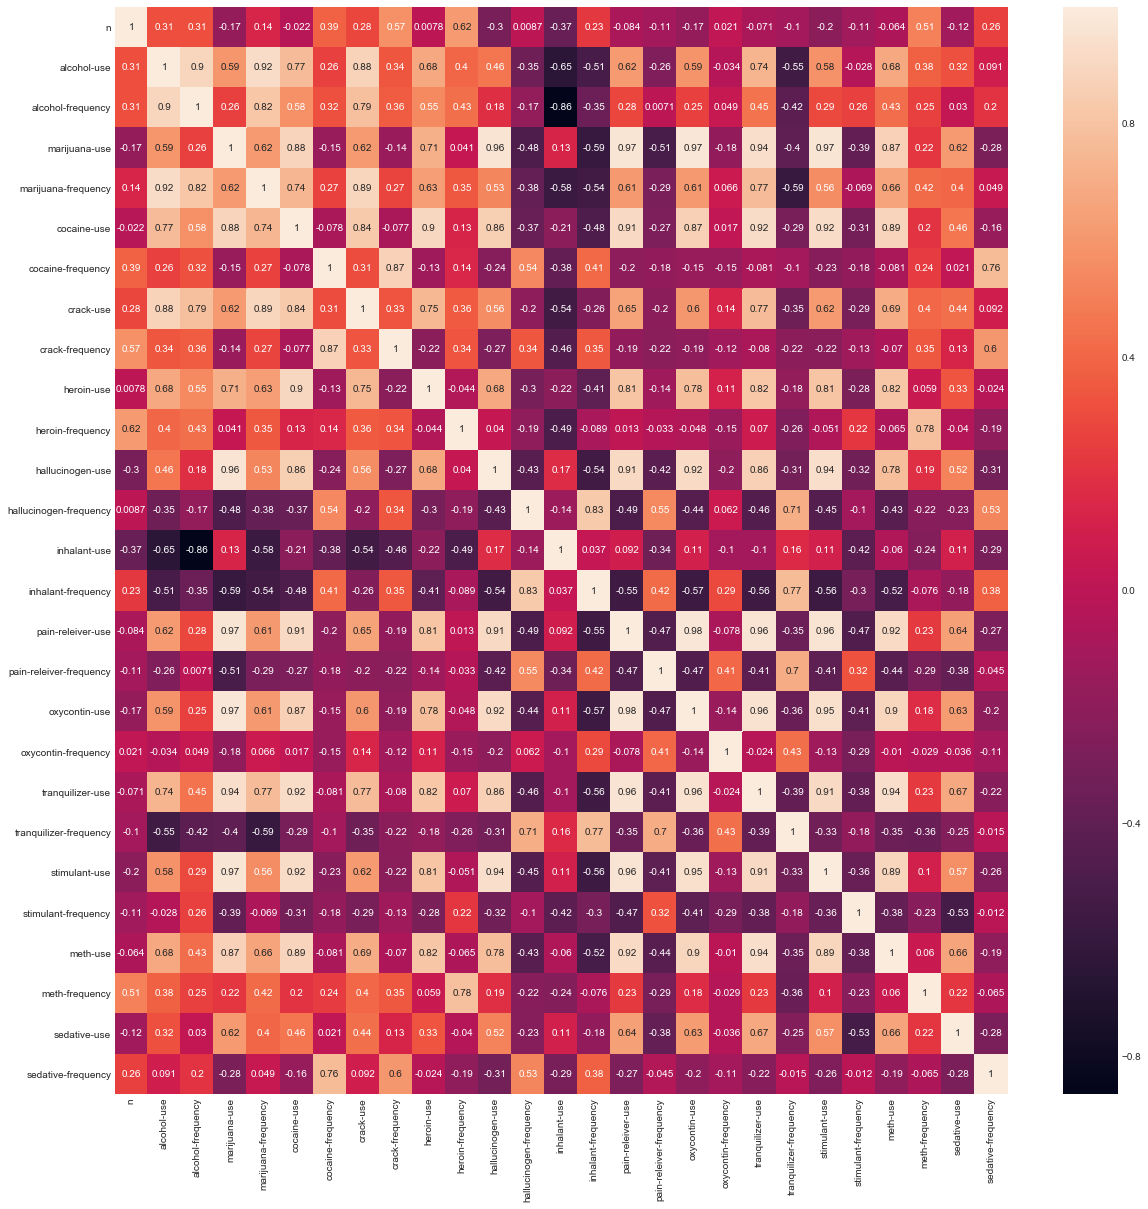

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(drug_corr, annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Text(0.5,1,u'Percent Use')

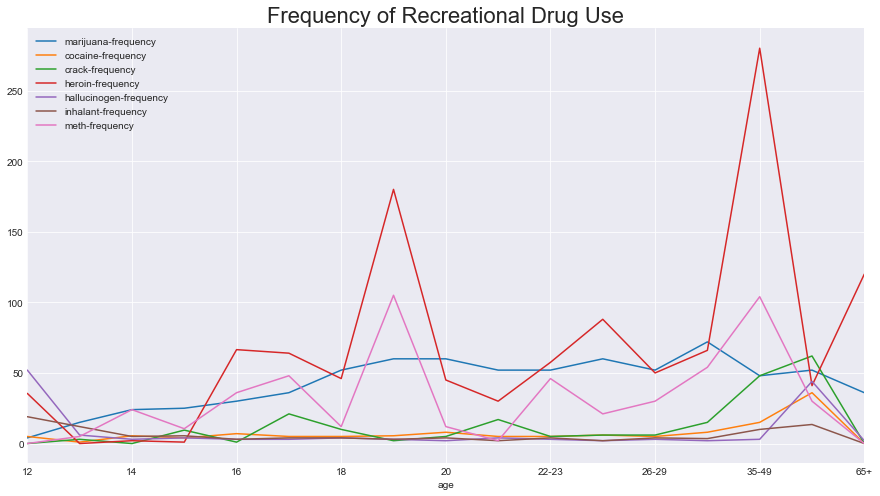

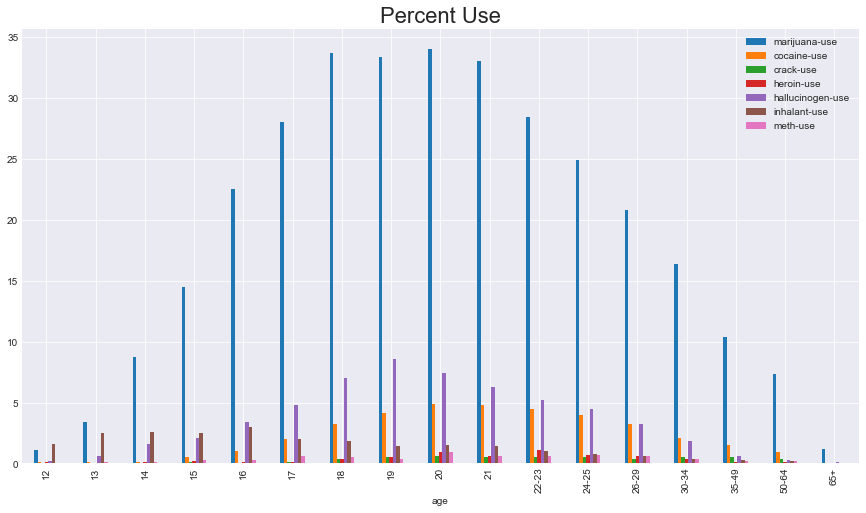

In [38]:
'''
Write a specific question you would like to answer with the data (that can be accomplished with EDA).
a. What drug is the most addictive, as measured by frequency of use(addiction)?
b. At what age does drug abuse peak?

'''
# only chosing non legal recreational drugs, which means alcohol, pain reliever, oxycontin, tranquilizer, sedative is excluded.


drug_f = drug[['marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency',
              'meth-frequency']]
drug_f_plot = drug_f.plot(figsize=(15,8))
drug_f_plot.set_title('Frequency of Recreational Drug Use',fontsize = 22)

drug_u=drug[['marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','meth-use']]
drug_u_plot = drug_u.plot(kind='bar',figsize=(15,8))
drug_u_plot.set_title('Percent Use', fontsize = 22)


### **Report**

Hypothesis to confirm: 20 < peak recreational drug use < 30 and that heroin is the most addictive drug 
>https://www.addictioncenter.com/community/these-are-the-5-most-addictive-substances-on-earth/

**Objective 1** is to find the most addictive recreational drug. This means only chosing non legal recreational drugs, which excludes 
alcohol, pain reliever, oxycontin, tranquilizer, sedative is excluded.

**Objective 2** is to find peak drug use by age group.

* Chart: Frequency of Recreational Drug Use shows frequency by age group. 
    This chart shows that **heroin** frequency is above other drugs
    across multiple age groups.
 
* Chart: Percent use shows a relatively low use of heroin. 
    
* Peak drug use is from age 18 - 21 years.





In [ ]:
<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64


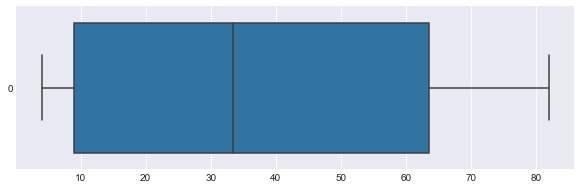

In [40]:
## **Outliers** < Q1 - 1.5*IQR, > Q3 + 1.5*IQR (interquartile range)

plt.figure(figsize=(10,3))
print data['Rate'].describe()
sns.boxplot(data = data['Rate'], orient ='h')

In [ ]:
# calc IQR
iqr1 = 1.5*(63.5 - 9)
iqr1

In [ ]:
<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [43]:
# method: pearson vs spearman

print 'pearson:', data['Verbal'].corr(data['Math']),'\n'
print 'spearman:', data['Verbal'].corr(data['Math'],method = 'spearman')

'''
Perason correlation is a measure of the strength of a linear assocation between two variables. It attempts to draw
a line of best fit through the data of the two variables; r indicates how far away the data points are to this line of best fit.
Variables have to be measured on interval or ratio scale. Both variables do not need to be measured on the same scale ie one
can be ratio, the other can be interval.

Spearman's rank-order correlation is the non-parametric version of Pearson's correlation. It measures the strength and direction
of association between two ranked variables (monotonic relationship - as the value of one variable increases, so does the
value of other variable; or as the value of one variable increases, the other variable value decreases). data must be ordinal, 
interval or ratio.

Spearman's correlation coeff +1 to -1. 

Calculation
Two columns of data  - Rank the two columns, highest -1, lowest 10.
Calculate the difference between the ranks, square the difference and sum all squared differences.
Apply to formula
'''



 pearson: 0.899870852544 

spearman: 0.905204884794


"\nPerason correlation is a measure of the strength of a linear assocation between two variables. It attempts to draw\na line of best fit through the data of the two variables; r indicates how far away the data points are to this line of best fit.\nVariables have to be measured on interval or ratio scale. Both variables do not need to be measured on the same scale ie one\ncan be ratio, the other can be interval.\n\nSpearman's rank-order correlation is the non-parametric version of Pearson's correlation. It measures the strength and direction\nof association between two ranked variables (monotonic relationship - as the value of one variable increases, so does the\nvalue of other variable; or as the value of one variable increases, the other variable value decreases). data must be ordinal, \ninterval or ratio.\n\nSpearman's correlation coeff +1 to -1. \n\nCalculation\nTwo columns of data  - Rank the two columns, highest -1, lowest 10.\nCalculate the difference between the ranks, square t

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64 

  State  Rate  Verbal  Math  V1  rate_percentile
0    CT    82     509   510  -1            67.82
1    NJ    81     499   513 -14            67.31
2    MA    79     511   515  -4            65.58
3    NY    77     495   505 -10            65.00
4    NH    72     520   516   4            59.16 

   State  Rate  Verbal  Math  V1  rate_percentile
23    CA    51     498   517 -19            34.11


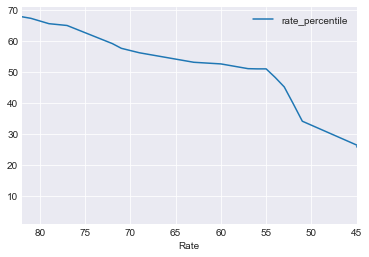

In [44]:
print data['Rate'].describe(),'\n'

r = data['Rate']
r1=[]
for i in r:
    r2 = np.percentile(r,i)
    r1.append(r2)
data['rate_percentile']=r1
print data.head(),'\n'

print data.loc[data['State']=='CA']

data.plot.line(x='Rate',y='rate_percentile')



### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

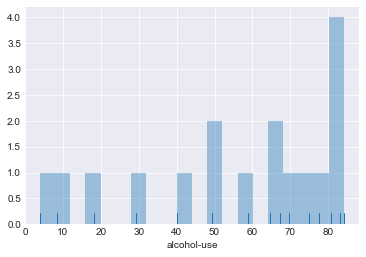

In [45]:
sns.distplot(drug['alcohol-use'],bins = 20, kde=False, rug=True)

In [ ]:
'''
Percentile scoring 
As discussed above in the drug case, the box plot provides
50 percentile aka median
75 percentile as the upper quartile
Outliers that fall outside the 
upper (75) and lower (25) quartile + 1.5 + or - 1.5*IQR can be
considered outliers.

'''